In [83]:
import os

dataset_dir = "/content/drive/MyDrive/Sign_Language_Detection/dataset"
if not os.path.exists(dataset_dir):
  os.makedirs(dataset_dir)
  print('Directory created successfully!')

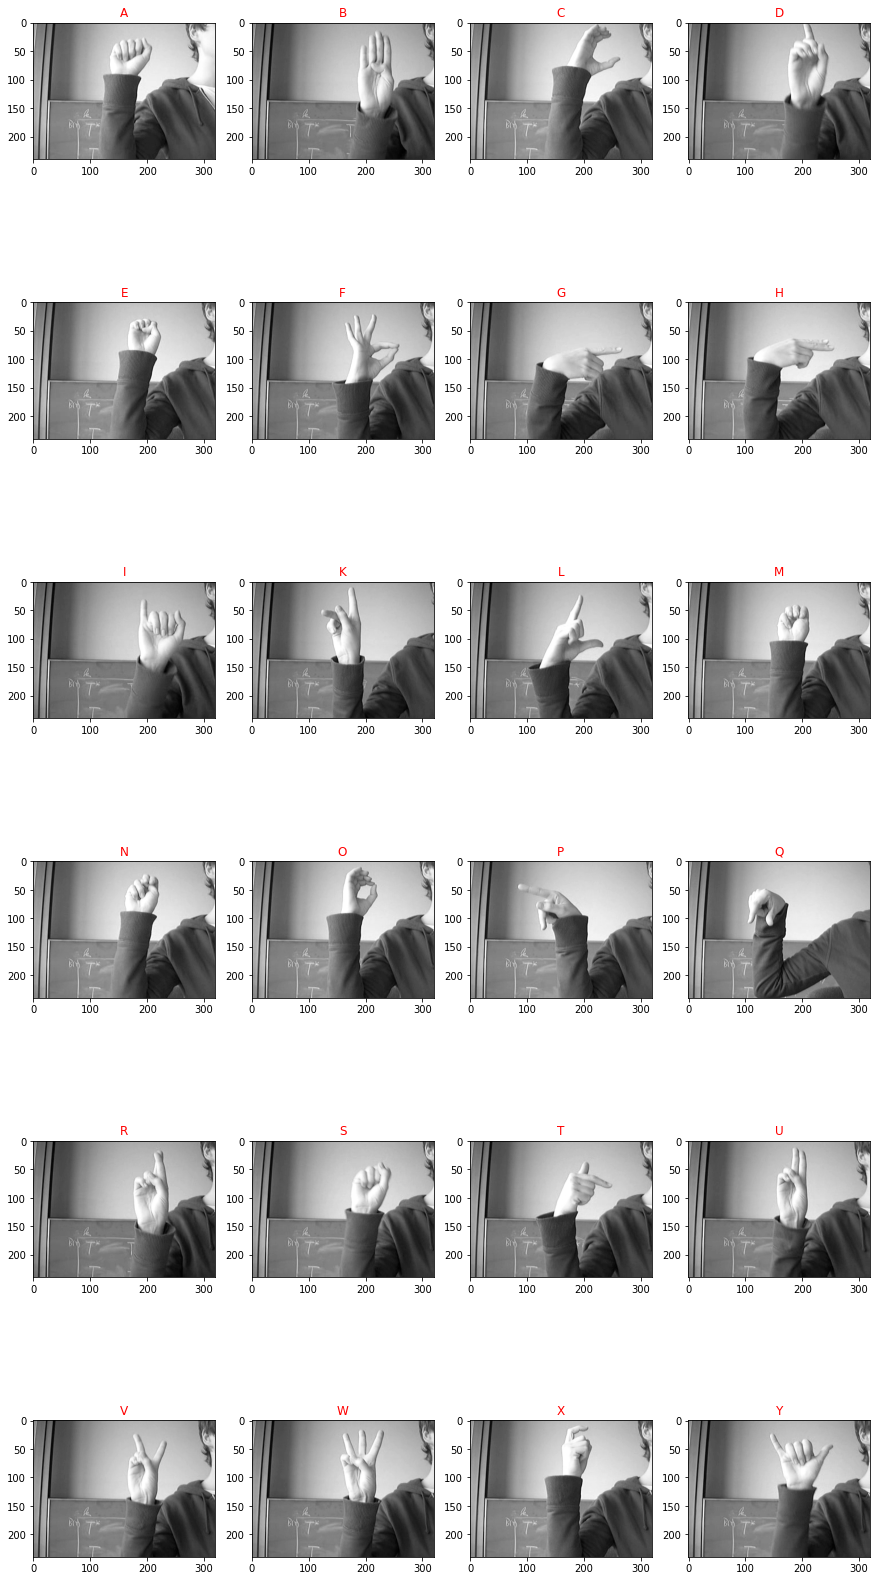

In [1]:
# Load and visualize all aplhabets (A - Z except J, and Z)in sign language 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

classes = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
plt.figure(figsize=(15,30))
for i in range(24):
  image = cv2.imread(os.path.join("/content/drive/MyDrive/Sign_Language_Detection/data/Dataset/user_3", f"{classes[i]}0.jpg"))

  # convert BGR color channel to RGB color channel
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # convert RGB to gray channel
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  plt.subplot(6,4,i+1)
  plt.imshow(gray, cmap='gray')
  plt.title(classes[i], color='r')

plt.show()

## Preparing Dataset

In [16]:
# Testing to create a csv with pandas 
import numpy as np
import pandas as pd

image_list = []
true_label_list = []
for i in range(10):
  true_label = np.random.randint(0,25)
  image_list.append(f'Image_{i}')
  true_label_list.append(true_label)

index = np.arange(1,11)

images = pd.Series(image_list)
true_labels = pd.Series(true_label_list)

dict = {'Image':images, 'Label': true_labels}

df = pd.DataFrame(dict)
print(df)
df.to_csv('/content/drive/MyDrive/Sign_Language_Detection/data/file1.csv', index=False)

     Image  Label
0  Image_0      4
1  Image_1      1
2  Image_2      4
3  Image_3     10
4  Image_4     12
5  Image_5     16
6  Image_6      5
7  Image_7      9
8  Image_8     23
9  Image_9     19


In [ ]:
dummy_csv_path = "/content/drive/MyDrive/Sign_Language_Detection/data/file1.csv"
dummy_csv = pd.read_csv(dummy_csv_path)
print(dummy_csv)
idx = 3
print(f'Image: {dummy_csv.iloc[idx,0]}\t Label: {dummy_csv.iloc[idx,1]}')

     Image  Label
0  Image_0     17
1  Image_1     10
2  Image_2     11
3  Image_3     14
4  Image_4     14
5  Image_5      2
6  Image_6     21
7  Image_7     12
8  Image_8      1
9  Image_9     19
Image: Image_3	 Label: 14


In [81]:
def get_class(image_name):
  for i in range(0,24):
    if classes[i] == image_name[0][0]:
      return i
  return -1

In [102]:
from skimage import io
import numpy as np

image_list = []
true_label_list = []

idx = 1
for i in range(3,11):
  if i == 8: continue
  root_dir = f"/content/drive/MyDrive/Sign_Language_Detection/data/Dataset/"
  csv_dir = root_dir + f'user_{i}' + f'/user_{i}_loc.csv'

  user_i_df = pd.read_csv(csv_dir)
  for j in range(len(user_i_df)):
    bbox = user_i_df.loc[j]
    file_name = bbox[0]
    label = get_class(file_name.split('/')[1])
    if label == -1: continue

    source_dir = root_dir + bbox[0]
    image = skimage.io.imread(source_dir)

    cropped_image = np.copy(image)
    cropped_image = cropped_image[bbox[2]:bbox[4], bbox[1]:bbox[3]]
    
    image_name = f'Image_{idx}.jpg'
    cv2.imwrite(dataset_dir + f'/{image_name}', cropped_image)
    img_path = dataset_dir + f'/{image_name}'
    img = cv2.imread(img_path)
    
    image_list.append(image_name)
    true_label_list.append(label)
    idx += 1

images = pd.Series(image_list)
labels = pd.Series(true_label_list)
dict = {"images":images, "labels":labels}
dataset_df = pd.DataFrame(dict)
dataset_df.to_csv(dataset_dir + f'/dataset.csv', index=False)
print('Dataset prepared successfully!')

Dataset prepared successfully!


## Analyzing csv file

In [109]:
images_df = pd.read_csv(dataset_dir + '/dataset.csv')

In [110]:
images_df.describe()

,labels
count,1680.000000
mean,11.500000
std,6.924248
min,0.000000
25%,5.750000
50%,11.500000
75%,17.250000
max,23.000000


In [108]:
print(images_df.head(20))

          images  labels
0    Image_1.jpg       0
1    Image_2.jpg       0
2    Image_3.jpg       0
3    Image_4.jpg       0
4    Image_5.jpg       0
5    Image_6.jpg       0
6    Image_7.jpg       0
7    Image_8.jpg       0
8    Image_9.jpg       0
9   Image_10.jpg       0
10  Image_11.jpg       1
11  Image_12.jpg       1
12  Image_13.jpg       1
13  Image_14.jpg       1
14  Image_15.jpg       1
15  Image_16.jpg       1
16  Image_17.jpg       1
17  Image_18.jpg       1
18  Image_19.jpg       1
19  Image_20.jpg       1


In [111]:
print(images_df.tail(20))

              images  labels
1660  Image_1661.jpg      22
1661  Image_1662.jpg      22
1662  Image_1663.jpg      22
1663  Image_1664.jpg      22
1664  Image_1665.jpg      22
1665  Image_1666.jpg      22
1666  Image_1667.jpg      22
1667  Image_1668.jpg      22
1668  Image_1669.jpg      22
1669  Image_1670.jpg      22
1670  Image_1671.jpg      23
1671  Image_1672.jpg      23
1672  Image_1673.jpg      23
1673  Image_1674.jpg      23
1674  Image_1675.jpg      23
1675  Image_1676.jpg      23
1676  Image_1677.jpg      23
1677  Image_1678.jpg      23
1678  Image_1679.jpg      23
1679  Image_1680.jpg      23


## Displaying one random image from dataset

Text(0.5, 1.0, 'N')

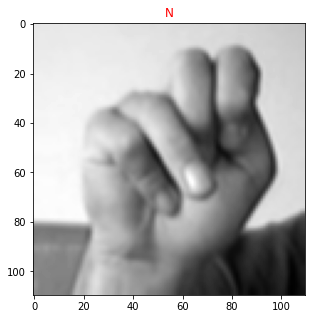

In [176]:
idx = np.random.randint(0,len(images_df))
image_path = dataset_dir + "/" + images_df.iloc[idx,0]
label = images_df.iloc[idx,1]

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.GaussianBlur(image, (3,3), 1)
fig = plt.figure(figsize=(10,5))
plt.imshow(image, cmap='gray')
plt.title(classes[label], color='r')